In [4]:
import requests
import pandas as pd
from datetime import datetime

# Function to fetch weather data
def fetch_weather_data(lat, lon, start_date, end_date):
    url = "https://historical-forecast-api.open-meteo.com/v1/forecast"
    params = {
        "latitude": lat,
        "longitude": lon,
        "hourly": "temperature_2m,relative_humidity_2m,windspeed_10m,winddirection_10m,precipitation,rain,cloudcover,surface_pressure",
        "start_date": start_date,
        "end_date": end_date,
    }
    print(f"Fetching weather data for lat: {lat}, lon: {lon} from {start_date} to {end_date}")
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json().get("hourly", {})
    else:
        print(f"Failed to fetch weather data: {response.status_code} {response.text}")
        return {}

# Process weather data into records
def process_weather_data(weather_data, city, country, lat, lon):
    if not weather_data:
        print(f"No weather data available for {city}, {country}.")
        return []

    weather_records = []
    for i in range(len(weather_data["time"])):
        dt = datetime.strptime(weather_data["time"][i], "%Y-%m-%dT%H:%M").strftime("%Y-%m-%d %H:%M:%S")  # Standardize datetime format
        weather_records.append({
            "datetime": dt,
            "temperature_2m": weather_data["temperature_2m"][i],
            "relative_humidity_2m": weather_data["relative_humidity_2m"][i],
            "windspeed_10m": weather_data["windspeed_10m"][i],
            "winddirection_10m": weather_data["winddirection_10m"][i],
            "precipitation": weather_data["precipitation"][i],
            "rain": weather_data.get("rain", [None] * len(weather_data["time"]))[i],
            "cloudcover": weather_data["cloudcover"][i],
            "surface_pressure": weather_data["surface_pressure"][i],
            "city": city,
            "country": country,
            "latitude": lat,
            "longitude": lon,
        })
    return weather_records

# Cities from different regions
CITIES = [
    {"lat": 24.8608, "lon": 67.0104, "city": "Karachi", "country": "Pakistan"},
    {"lat": 31.558, "lon": 74.3507, "city": "Lahore", "country": "Pakistan"},
    {"lat": 33.7215, "lon": 73.0433, "city": "Islamabad", "country": "Pakistan"},
    {"lat": 40.7128, "lon": -74.0060, "city": "New York", "country": "USA"},
    {"lat": 34.0522, "lon": -118.2437, "city": "Los Angeles", "country": "USA"},
    {"lat": 45.5017, "lon": -73.5673, "city": "Montreal", "country": "Canada"},
    {"lat": 19.4326, "lon": -99.1332, "city": "Mexico City", "country": "Mexico"},
    {"lat": 43.6511, "lon": -79.3470, "city": "Toronto", "country": "Canada"},
    {"lat": -23.5505, "lon": -46.6333, "city": "São Paulo", "country": "Brazil"},
    {"lat": -34.6037, "lon": -58.3816, "city": "Buenos Aires", "country": "Argentina"},
    {"lat": -12.0464, "lon": -77.0428, "city": "Lima", "country": "Peru"},
    {"lat": -33.4489, "lon": -70.6693, "city": "Santiago", "country": "Chile"},
    {"lat": -0.1807, "lon": -78.4678, "city": "Quito", "country": "Ecuador"},
    {"lat": 51.5074, "lon": -0.1278, "city": "London", "country": "UK"},
    {"lat": 48.8566, "lon": 2.3522, "city": "Paris", "country": "France"},
    {"lat": 52.5200, "lon": 13.4050, "city": "Berlin", "country": "Germany"},
    {"lat": 41.9028, "lon": 12.4964, "city": "Rome", "country": "Italy"},
    {"lat": 55.7558, "lon": 37.6173, "city": "Moscow", "country": "Russia"},
    {"lat": -26.2041, "lon": 28.0473, "city": "Johannesburg", "country": "South Africa"},
    {"lat": 6.5244, "lon": 3.3792, "city": "Lagos", "country": "Nigeria"},
    {"lat": -1.2864, "lon": 36.8172, "city": "Nairobi", "country": "Kenya"},
    {"lat": 30.0444, "lon": 31.2357, "city": "Cairo", "country": "Egypt"},
    {"lat": 33.5731, "lon": -7.5898, "city": "Casablanca", "country": "Morocco"},
    {"lat": -33.8688, "lon": 151.2093, "city": "Sydney", "country": "Australia"},
    {"lat": -37.8136, "lon": 144.9631, "city": "Melbourne", "country": "Australia"},
    {"lat": -36.8485, "lon": 174.7633, "city": "Auckland", "country": "New Zealand"},
    {"lat": -35.2809, "lon": 149.1300, "city": "Canberra", "country": "Australia"},
    {"lat": -17.7134, "lon": 178.0650, "city": "Suva", "country": "Fiji"},
    {"lat": 35.6895, "lon": 139.6917, "city": "Tokyo", "country": "Japan"},
    {"lat": 28.6139, "lon": 77.2090, "city": "Delhi", "country": "India"},
    {"lat": 31.2304, "lon": 121.4737, "city": "Shanghai", "country": "China"},
    {"lat": 13.7563, "lon": 100.5018, "city": "Bangkok", "country": "Thailand"},
    {"lat": 39.9042, "lon": 116.4074, "city": "Beijing", "country": "China"},
]

START_DATE = "2022-01-01"
END_DATE = "2024-12-29"

# Fetch and process data for all cities
all_records = []
for city_info in CITIES:
    city_data = fetch_weather_data(city_info["lat"], city_info["lon"], START_DATE, END_DATE)
    city_records = process_weather_data(city_data, city_info["city"], city_info["country"], city_info["lat"], city_info["lon"])
    all_records.extend(city_records)

# Combine records and save to CSV
if all_records:
    weather_df = pd.DataFrame(all_records)
    weather_df = weather_df.drop_duplicates(subset=["datetime", "city"])
    weather_df.to_csv("weather_data_100_cities.csv", index=False)
    print("Weather data saved to weather_data_100_cities.csv")
else:
    print("No weather data to save.")


Fetching weather data for lat: 24.8608, lon: 67.0104 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: 31.558, lon: 74.3507 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: 33.7215, lon: 73.0433 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: 40.7128, lon: -74.006 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: 34.0522, lon: -118.2437 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: 45.5017, lon: -73.5673 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: 19.4326, lon: -99.1332 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: 43.6511, lon: -79.347 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: -23.5505, lon: -46.6333 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: -34.6037, lon: -58.3816 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: -12.0464, lon: -77.0428 from 2022-01-01 to 2024-12-29
Fetching weather data for lat: -33.4489, lon: -70.6693 from 2022-01-01 to 2024

In [5]:
weather_df.head()

,datetime,temperature_2m,relative_humidity_2m,windspeed_10m,winddirection_10m,precipitation,rain,cloudcover,surface_pressure,city,country,latitude,longitude
0,2022-01-01 00:00:00,18.6,25,18.1,55,0.0,0.0,0,1019.1,Karachi,Pakistan,24.8608,67.0104
1,2022-01-01 01:00:00,18.4,25,16.3,55,0.0,0.0,5,1019.5,Karachi,Pakistan,24.8608,67.0104
2,2022-01-01 02:00:00,18.3,24,16.3,59,0.0,0.0,48,1020.0,Karachi,Pakistan,24.8608,67.0104
3,2022-01-01 03:00:00,18.4,24,15.9,52,0.0,0.0,99,1020.7,Karachi,Pakistan,24.8608,67.0104
4,2022-01-01 04:00:00,19.4,21,17.4,63,0.0,0.0,97,1021.2,Karachi,Pakistan,24.8608,67.0104


In [6]:
print(weather_df.isna().any())
print(weather_df.isnull().sum())

datetime                False
temperature_2m          False
relative_humidity_2m    False
windspeed_10m           False
winddirection_10m       False
precipitation           False
rain                    False
cloudcover              False
surface_pressure        False
city                    False
country                 False
latitude                False
longitude               False
dtype: bool
datetime                0
temperature_2m          0
relative_humidity_2m    0
windspeed_10m           0
winddirection_10m       0
precipitation           0
rain                    0
cloudcover              0
surface_pressure        0
city                    0
country                 0
latitude                0
longitude               0
dtype: int64


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866448 entries, 0 to 866447
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   datetime              866448 non-null  object 
 1   temperature_2m        866448 non-null  float64
 2   relative_humidity_2m  866448 non-null  int64  
 3   windspeed_10m         866448 non-null  float64
 4   winddirection_10m     866448 non-null  int64  
 5   precipitation         866448 non-null  float64
 6   rain                  866448 non-null  float64
 7   cloudcover            866448 non-null  int64  
 8   surface_pressure      866448 non-null  float64
 9   city                  866448 non-null  object 
 10  country               866448 non-null  object 
 11  latitude              866448 non-null  float64
 12  longitude             866448 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 85.9+ MB


In [7]:
weather_df['date']= weather_df['datetime'].str.split(' ').str[0]
weather_df['time']= weather_df['datetime'].str.split(' ').str[1]
weather_df

,datetime,temperature_2m,relative_humidity_2m,windspeed_10m,winddirection_10m,precipitation,rain,cloudcover,surface_pressure,city,country,latitude,longitude,date,time
0,2022-01-01 00:00:00,18.6,25,18.1,55,0.0,0.0,0,1019.1,Karachi,Pakistan,24.8608,67.0104,2022-01-01,00:00:00
1,2022-01-01 01:00:00,18.4,25,16.3,55,0.0,0.0,5,1019.5,Karachi,Pakistan,24.8608,67.0104,2022-01-01,01:00:00
2,2022-01-01 02:00:00,18.3,24,16.3,59,0.0,0.0,48,1020.0,Karachi,Pakistan,24.8608,67.0104,2022-01-01,02:00:00
3,2022-01-01 03:00:00,18.4,24,15.9,52,0.0,0.0,99,1020.7,Karachi,Pakistan,24.8608,67.0104,2022-01-01,03:00:00
4,2022-01-01 04:00:00,19.4,21,17.4,63,0.0,0.0,97,1021.2,Karachi,Pakistan,24.8608,67.0104,2022-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866443,2024-12-29 19:00:00,-3.9,50,3.8,17,0.0,0.0,0,1013.0,Beijing,China,39.9042,116.4074,2024-12-29,19:00:00
866444,2024-12-29 20:00:00,-2.5,41,5.0,339,0.0,0.0,0,1013.1,Beijing,China,39.9042,116.4074,2024-12-29,20:00:00
866445,2024-12-29 21:00:00,-1.7,35,6.6,331,0.0,0.0,0,1013.1,Beijing,China,39.9042,116.4074,2024-12-29,21:00:00
866446,2024-12-29 22:00:00,-1.0,32,8.3,326,0.0,0.0,0,1013.8,Beijing,China,39.9042,116.4074,2024-12-29,22:00:00


In [8]:
weather_df.drop('datetime', axis=1, inplace=True)
weather_df

,temperature_2m,relative_humidity_2m,windspeed_10m,winddirection_10m,precipitation,rain,cloudcover,surface_pressure,city,country,latitude,longitude,date,time
0,18.6,25,18.1,55,0.0,0.0,0,1019.1,Karachi,Pakistan,24.8608,67.0104,2022-01-01,00:00:00
1,18.4,25,16.3,55,0.0,0.0,5,1019.5,Karachi,Pakistan,24.8608,67.0104,2022-01-01,01:00:00
2,18.3,24,16.3,59,0.0,0.0,48,1020.0,Karachi,Pakistan,24.8608,67.0104,2022-01-01,02:00:00
3,18.4,24,15.9,52,0.0,0.0,99,1020.7,Karachi,Pakistan,24.8608,67.0104,2022-01-01,03:00:00
4,19.4,21,17.4,63,0.0,0.0,97,1021.2,Karachi,Pakistan,24.8608,67.0104,2022-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866443,-3.9,50,3.8,17,0.0,0.0,0,1013.0,Beijing,China,39.9042,116.4074,2024-12-29,19:00:00
866444,-2.5,41,5.0,339,0.0,0.0,0,1013.1,Beijing,China,39.9042,116.4074,2024-12-29,20:00:00
866445,-1.7,35,6.6,331,0.0,0.0,0,1013.1,Beijing,China,39.9042,116.4074,2024-12-29,21:00:00
866446,-1.0,32,8.3,326,0.0,0.0,0,1013.8,Beijing,China,39.9042,116.4074,2024-12-29,22:00:00


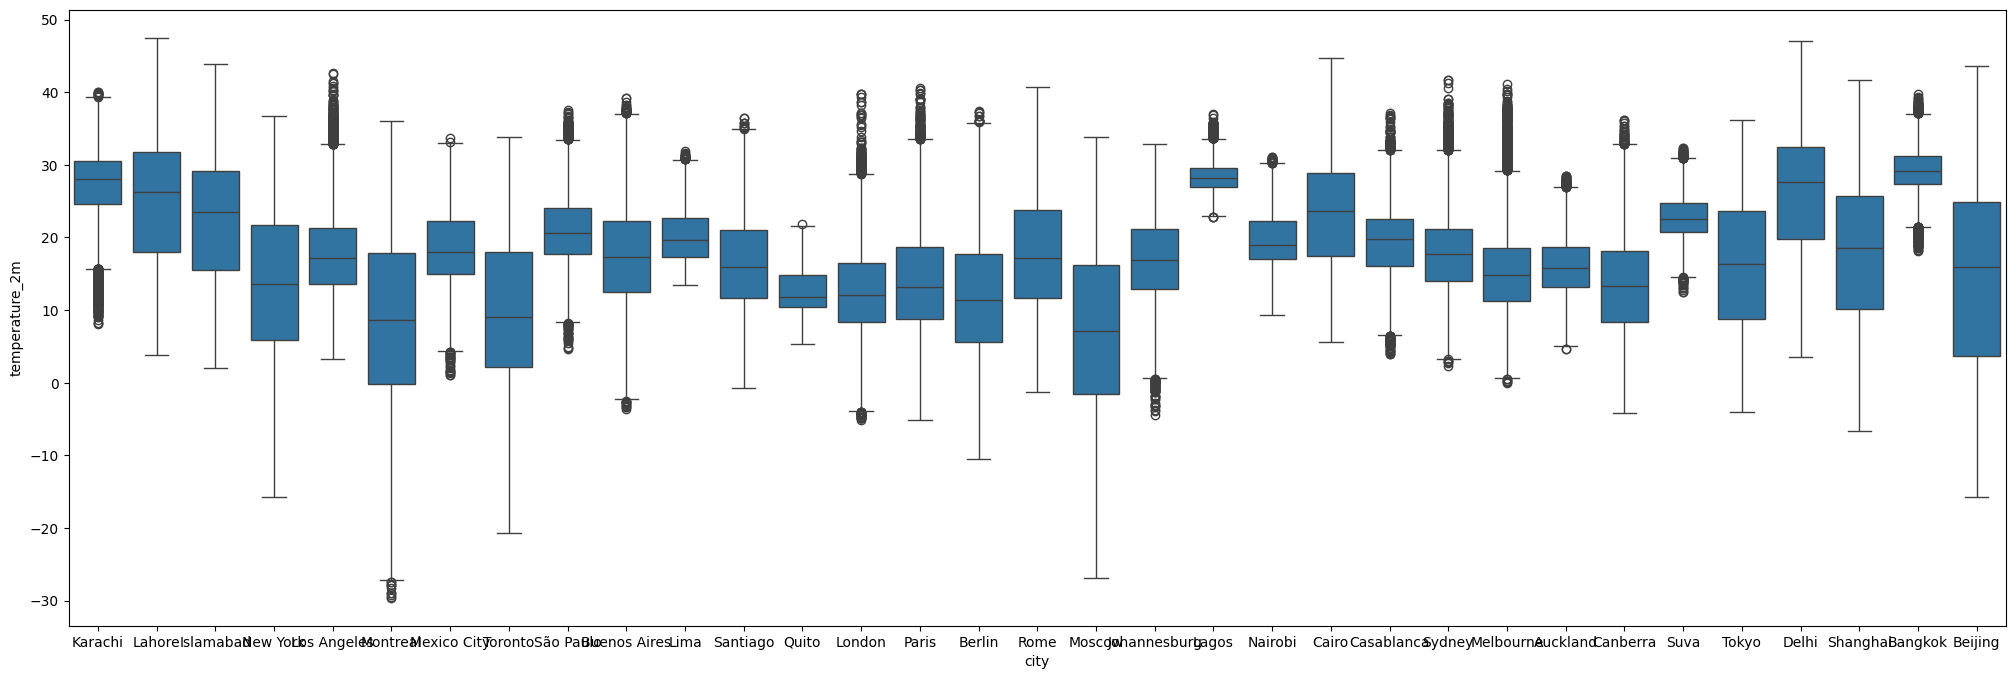

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 8))
sns.boxplot(data=weather_df, x='city', y='temperature_2m')
plt.show()

In [9]:
daily_avg = (
    weather_df.groupby(["city", "country", "latitude", "longitude", "date"])
    .agg({
        "temperature_2m": "mean",
        "relative_humidity_2m": "mean",
        "windspeed_10m": "mean",
        "winddirection_10m": "mean",
        "precipitation": "mean",
        "rain": "mean",
        "cloudcover": "mean",
        "surface_pressure": "mean"
    })
    .reset_index()
)

# Save the aggregated data to a new file
daily_avg.to_csv("daily_weather_data.csv", index=False)
print("Daily average data saved to daily_weather_data.csv")

Daily average data saved to daily_weather_data.csv


In [10]:
daily_df = pd.read_csv("daily_weather_data.csv")
daily_df

,city,country,latitude,longitude,date,temperature_2m,relative_humidity_2m,windspeed_10m,winddirection_10m,precipitation,rain,cloudcover,surface_pressure
0,Auckland,New Zealand,-36.8485,174.7633,2022-01-01,20.258333,70.250000,15.725000,140.375000,0.000000,0.000000,1.375000,1014.150000
1,Auckland,New Zealand,-36.8485,174.7633,2022-01-02,21.141667,63.583333,13.687500,72.416667,0.000000,0.000000,54.625000,1015.920833
2,Auckland,New Zealand,-36.8485,174.7633,2022-01-03,21.745833,63.916667,7.208333,171.791667,0.000000,0.000000,75.625000,1010.112500
3,Auckland,New Zealand,-36.8485,174.7633,2022-01-04,22.391667,62.875000,8.662500,185.333333,0.000000,0.000000,33.208333,1006.795833
4,Auckland,New Zealand,-36.8485,174.7633,2022-01-05,21.595833,65.750000,14.225000,220.875000,0.000000,0.000000,83.291667,1005.725000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36097,Toronto,Canada,43.6511,-79.3470,2024-12-25,-2.454167,80.708333,8.625000,110.750000,0.000000,0.000000,100.000000,1019.375000
36098,Toronto,Canada,43.6511,-79.3470,2024-12-26,-0.616667,79.750000,12.579167,53.291667,0.000000,0.000000,96.375000,1020.025000
36099,Toronto,Canada,43.6511,-79.3470,2024-12-27,1.304167,81.125000,20.137500,78.750000,0.000000,0.000000,93.875000,1016.808333
36100,Toronto,Canada,43.6511,-79.3470,2024-12-28,4.945833,88.666667,15.087500,61.750000,0.000000,0.000000,85.666667,1007.537500


In [11]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Function to get city latitude and longitude using the geocoding API
def fetch_city_coordinates(city_name):
    geocoding_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city_name}&count=1&language=en&format=json"
    response = requests.get(geocoding_url)
    if response.status_code == 200:
        data = response.json()
        if "results" in data and len(data["results"]) > 0:
            city_info = data["results"][0]
            return city_info["latitude"], city_info["longitude"]
        else:
            raise ValueError(f"City '{city_name}' not found.")
    else:
        raise ValueError("Failed to fetch city coordinates.")

# Function to fetch last 7 days of weather data using the weather API
def fetch_last_7_days_weather(city_name):
    try:
        latitude, longitude = fetch_city_coordinates(city_name)
        end_date = datetime.now().strftime("%Y-%m-%d")
        start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d")
        weather_url = (
            f"https://archive-api.open-meteo.com/v1/archive"
            f"?latitude={latitude}&longitude={longitude}&start_date={start_date}"
            f"&end_date={end_date}&hourly=temperature_2m,relative_humidity_2m,windspeed_10m,winddirection_10m,precipitation,rain,cloudcover,surface_pressure"
            f"&timezone=auto"
        )
        response = requests.get(weather_url)
        if response.status_code == 200:
            weather_data = response.json()
            hourly_data = weather_data["hourly"]
            df = pd.DataFrame(hourly_data)

            # Ensure numeric dtype for all columns
            numeric_columns = ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                               "precipitation", "rain", "cloudcover", "surface_pressure"]
            for col in numeric_columns:
                df[col] = pd.to_numeric(df[col], errors="coerce")

            # Drop rows with NaN values in essential columns
            df.dropna(subset=numeric_columns, inplace=True)

            # Calculate daily averages
            df["date"] = pd.to_datetime(df["time"]).dt.date
            daily_data = df.groupby("date")[numeric_columns].mean().reset_index()
            return daily_data
        else:
            raise ValueError("Failed to fetch weather data.")
    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

# Prepare training and testing data
def prepare_data(data):
    data["date"] = pd.to_datetime(data["date"])
    train_data = data[data["date"] < "2024-01-01"]
    test_data = data[data["date"] >= "2024-01-01"]
    features = ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                "precipitation", "rain", "cloudcover", "surface_pressure"]

    X_train = train_data[features]
    y_train_temp = train_data["temperature_2m"]
    y_train_humidity = train_data["relative_humidity_2m"]

    X_test = test_data[features]
    y_test_temp = test_data["temperature_2m"]
    y_test_humidity = test_data["relative_humidity_2m"]

    return X_train, y_train_temp, y_train_humidity, X_test, y_test_temp, y_test_humidity

# Train models, evaluate performance, and save them
def train_and_evaluate_models(X_train, y_train_temp, y_train_humidity, X_test, y_test_temp, y_test_humidity):
    temp_model = RandomForestRegressor(n_estimators=100, random_state=42)
    humidity_model = RandomForestRegressor(n_estimators=100, random_state=42)

    temp_model.fit(X_train, y_train_temp)
    humidity_model.fit(X_train, y_train_humidity)

    # Evaluate models
    temp_predictions = temp_model.predict(X_test)
    humidity_predictions = humidity_model.predict(X_test)

    print(f"RMSE: {mean_squared_error(y_test_temp, temp_predictions)**0.5}")  # Calculate RMSE manually
    #print(f"RMSE: {mean_squared_error(y_test_temp, temp_predictions, squared=False)}")  # Original line causing the error
    print(f"R2 Score: {r2_score(y_test_temp, temp_predictions)}")

    print("Humidity Model Performance:")
    print(f"RMSE: {mean_squared_error(y_test_humidity, humidity_predictions)**0.5}") # Calculate RMSE manually
    #print(f"RMSE: {mean_squared_error(y_test_humidity, humidity_predictions, squared=False)}") # Original line causing the error
    print(f"R2 Score: {r2_score(y_test_humidity, humidity_predictions)}")

    # Save models
    joblib.dump(temp_model, "temperature_model.pkl")
    joblib.dump(humidity_model, "humidity_model.pkl")
    print("Models trained, evaluated, and saved.")

# Load models
def load_models():
    temp_model = joblib.load("temperature_model.pkl")
    humidity_model = joblib.load("humidity_model.pkl")
    return temp_model, humidity_model

# Predict future weather for a city
def predict_future_weather(city_name):
    try:
        recent_data = fetch_last_7_days_weather(city_name)
        if recent_data is not None:
            features = ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                        "precipitation", "rain", "cloudcover", "surface_pressure"]
            temp_model, humidity_model = load_models()
            recent_data["predicted_temperature"] = temp_model.predict(recent_data[features])
            recent_data["predicted_humidity"] = humidity_model.predict(recent_data[features])
            return recent_data[["date", "predicted_temperature", "predicted_humidity"]]
        else:
            print("Could not fetch data for predictions.")
            return None
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Main Function
if __name__ == "__main__":
    # Load your main dataset
    try:
        data = pd.read_csv("daily_weather_data.csv")  # Replace with your dataset path
    except FileNotFoundError:
        print("Dataset not found. Ensure your file path is correct.")
        exit()

    # Train and save models
    X_train, y_train_temp, y_train_humidity, X_test, y_test_temp, y_test_humidity = prepare_data(data)
    train_and_evaluate_models(X_train, y_train_temp, y_train_humidity, X_test, y_test_temp, y_test_humidity)

    # Predict future weather for a city
    city_name = "karachi"
    predictions = predict_future_weather(city_name)
    if predictions is not None:
        print("Predictions for the next 7 days:")
        print(predictions)


RMSE: 0.02529573780124832
R2 Score: 0.9999908480534763
Humidity Model Performance:
RMSE: 0.003434122613030099
R2 Score: 0.9999999480124458
Models trained, evaluated, and saved.
Predictions for the next 7 days:
         date  predicted_temperature  predicted_humidity
0  2024-12-25              18.675042           39.915417
1  2024-12-26              18.904292           37.790417
2  2024-12-27              18.859667           36.083750
3  2024-12-28              18.620833           31.417083
4  2024-12-29              18.970708           35.123750
5  2024-12-30              19.600000           32.917917
6  2024-12-31              16.150042           44.834583


In [12]:
city_name = "berlin"
predictions = predict_future_weather(city_name)
if predictions is not None:
      print("Predictions for the next 7 days:")
      print(predictions)

Predictions for the next 7 days:
         date  predicted_temperature  predicted_humidity
0  2024-12-25               2.506000           93.380417
1  2024-12-26               5.320500           96.839583
2  2024-12-27               3.462750           95.542917
3  2024-12-28              -1.268083           96.871667
4  2024-12-29              -0.791458           92.587917
5  2024-12-30               2.510417           90.360000
6  2024-12-31               1.193417           90.000000


In [4]:
import pandas as pd

In [2]:
pip install fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00


In [18]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import pandas as pd
from datetime import datetime, timedelta
import requests

app = FastAPI()

# Model for input validation
class CityRequest(BaseModel):
    city: str

# Load trained models
temperature_model = joblib.load("temperature_model.pkl")
humidity_model = joblib.load("humidity_model.pkl")

# Fetch city coordinates
def fetch_city_coordinates(city_name):
    geocoding_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city_name}&count=1&language=en&format=json"
    response = requests.get(geocoding_url)
    if response.status_code == 200:
        data = response.json()
        if "results" in data and len(data["results"]) > 0:
            city_info = data["results"][0]
            return city_info["latitude"], city_info["longitude"]
        else:
            raise HTTPException(status_code=404, detail="City not found.")
    else:
        raise HTTPException(status_code=500, detail="Failed to fetch city coordinates.")

# Fetch last 7 days weather data
def fetch_last_7_days_weather(city_name):
    latitude, longitude = fetch_city_coordinates(city_name)
    end_date = datetime.now().strftime("%Y-%m-%d")
    start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d")
    weather_url = (
        f"https://archive-api.open-meteo.com/v1/archive"
        f"?latitude={latitude}&longitude={longitude}&start_date={start_date}"
        f"&end_date={end_date}&hourly=temperature_2m,relative_humidity_2m,windspeed_10m,winddirection_10m,precipitation,rain,cloudcover,surface_pressure"
        f"&timezone=auto"
    )
    response = requests.get(weather_url)
    if response.status_code == 200:
        weather_data = response.json()
        hourly_data = weather_data["hourly"]
        df = pd.DataFrame(hourly_data)

        # Calculate daily averages
        df["date"] = pd.to_datetime(df["time"]).dt.date
        numeric_columns = ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                           "precipitation", "rain", "cloudcover", "surface_pressure"]
        daily_data = df.groupby("date")[numeric_columns].mean().reset_index()
        return daily_data
    else:
        raise HTTPException(status_code=500, detail="Failed to fetch weather data.")

# Predict endpoint
@app.post("/predict/")
def predict_weather(request: CityRequest):
    city_name = request.city
    recent_data = fetch_last_7_days_weather(city_name)
    features = ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                "precipitation", "rain", "cloudcover", "surface_pressure"]

    try:
        recent_data["predicted_temperature"] = temperature_model.predict(recent_data[features])
        recent_data["predicted_humidity"] = humidity_model.predict(recent_data[features])
        return recent_data[["date", "predicted_temperature", "predicted_humidity"]].to_dict(orient="records")
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Prediction failed: {str(e)}")


In [6]:
import subprocess

# Run the FastAPI server with uvicorn on port 8001
subprocess.Popen(["uvicorn", "main:app", "--reload", "--host", "127.0.0.1", "--port", "8001"])


<Popen: returncode: None args: ['uvicorn', 'main:app', '--reload', '--host',...>

In [3]:
!pip install pyngrok


In [4]:
!ngrok authtoken 2r1Mt0catzlN78IiORWNiEpzvzA_65WWiDNQAvCN126XNgcAS

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [5]:
!pip install nest_asyncio



In [7]:
import nest_asyncio
import uvicorn
from fastapi import FastAPI
from pyngrok import ngrok
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import pandas as pd
from datetime import datetime, timedelta
import requests

# Apply nest_asyncio
nest_asyncio.apply()



app = FastAPI()

# Model for input validation
class CityRequest(BaseModel):
    city: str

# Load trained models
temperature_model = joblib.load("temperature_model.pkl")
humidity_model = joblib.load("humidity_model.pkl")

# Fetch city coordinates
def fetch_city_coordinates(city_name):
    geocoding_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city_name}&count=1&language=en&format=json"
    response = requests.get(geocoding_url)
    if response.status_code == 200:
        data = response.json()
        if "results" in data and len(data["results"]) > 0:
            city_info = data["results"][0]
            return city_info["latitude"], city_info["longitude"]
        else:
            raise HTTPException(status_code=404, detail="City not found.")
    else:
        raise HTTPException(status_code=500, detail="Failed to fetch city coordinates.")

# Fetch last 7 days weather data
def fetch_last_7_days_weather(city_name):
    latitude, longitude = fetch_city_coordinates(city_name)
    end_date = datetime.now().strftime("%Y-%m-%d")
    start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d")
    weather_url = (
        f"https://archive-api.open-meteo.com/v1/archive"
        f"?latitude={latitude}&longitude={longitude}&start_date={start_date}"
        f"&end_date={end_date}&hourly=temperature_2m,relative_humidity_2m,windspeed_10m,winddirection_10m,precipitation,rain,cloudcover,surface_pressure"
        f"&timezone=auto"
    )
    response = requests.get(weather_url)
    if response.status_code == 200:
        weather_data = response.json()
        hourly_data = weather_data["hourly"]
        df = pd.DataFrame(hourly_data)

        # Calculate daily averages
        df["date"] = pd.to_datetime(df["time"]).dt.date
        numeric_columns = ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                           "precipitation", "rain", "cloudcover", "surface_pressure"]
        daily_data = df.groupby("date")[numeric_columns].mean().reset_index()
        return daily_data
    else:
        raise HTTPException(status_code=500, detail="Failed to fetch weather data.")

# Predict endpoint
@app.post("/predict/")
def predict_weather(request: CityRequest):
    city_name = request.city
    recent_data = fetch_last_7_days_weather(city_name)
    features = ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                "precipitation", "rain", "cloudcover", "surface_pressure"]

    try:
        recent_data["predicted_temperature"] = temperature_model.predict(recent_data[features])
        recent_data["predicted_humidity"] = humidity_model.predict(recent_data[features])
        return recent_data[["date", "predicted_temperature", "predicted_humidity"]].to_dict(orient="records")
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Prediction failed: {str(e)}")



# Set up a tunnel to the FastAPI server
public_url = ngrok.connect(8001)
print(f"FastAPI is live at: {public_url}")

# Start the FastAPI server
uvicorn.run(app, host="0.0.0.0", port=8001)


INFO:     Started server process [424]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8001 (Press CTRL+C to quit)


FastAPI is live at: NgrokTunnel: "https://6593-34-148-233-50.ngrok-free.app" -> "http://localhost:8001"
INFO:     111.88.123.138:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     111.88.123.138:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK
INFO:     111.88.123.138:0 - "POST /predict/ HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [424]
